In [0]:
# Intro to Data Science, Fall 2019 @ CCNY
# CSC-599.70-Course-Project
# Team Member & Name: RentAdvisor (3-Member)

# HASIBUL ISLAM
# DZHONIBEK PARMANKULOV
# ABDUR RAFEY

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [0]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
submit1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)


In [0]:
train_df.sample(5)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7369549,#2H,372121,2,2.0,1050.0,2018-07-16 11:45:40,544 UNION AVENUE,Brooklyn,11211,40.716999,-73.951797,3000000.0,3027360001,7.0,2013.0,3.0500,1,1,0,1,0,1,1,1,1,1,0,0,0,0,4141,1,SUBLET IN PRIME LOCATION. From August 2018 to ...,Williamsburg,Brooklyn,2H,2.0,H
7224664,#31E,69010,1,1.0,585.0,2018-05-31 16:06:20,235 EAST 40 STREET,New York,10016,40.749199,-73.973701,1037178.0,1013147501,41.0,1986.0,3.1667,1,1,0,1,0,1,0,0,1,0,1,1,0,0,3250,0,"Beautiful, Sunny high floor 1 bedroom/1 bath i...",Midtown East,Manhattan,31E,31.0,E
7421167,#6F,1344286,1,1.0,700.0,2018-07-30 11:19:07,82-06 34 AVENUE,Jackson Heights,11372,40.753514,-73.884707,4035442.0,4014430001,6.0,1928.0,6.3500,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1800,0,"Sorry, no pets or guarantors. Applicants must ...",Jackson Heights,Queens,6F,6.0,F
7138201,NaN,1397209,1,1.0,800.0,2018-05-02 13:38:47,112-41 72 ROAD,Forest Hills,11375,40.721677,-73.836726,4052714.0,4022480125,6.0,1941.0,3.1500,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1950,0,Beautiful sun-drenched one bedroom apartment i...,Forest Hills,Queens,NaN,NaN,NaN
7173781,#7,48943,2,2.0,1000.0,2018-05-14 07:37:11,265 1 AVENUE,New York,10003,40.732438,-73.982139,1020423.0,1009220022,5.0,1910.0,1.1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3400,0,Massive entire floor 2BR apartment with 2 ful...,Gramercy Park,Manhattan,7,NaN,NaN


In [0]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',
    'addr_zip','floor_count',#'has_elevator',#'has_dishwasher',	#'is_furnished',	
    'has_gym','allows_pets',#'has_garage',
    'has_concierge',#'has_pool',#'has_garden',	
    #the reason of commenting out certain feature is because they are increasing mean squared error
]
train_features = train_df[feature_cols] 

# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']

In [0]:
# using linear regression method
lreg = LinearRegression()
lreg.fit(train_features, train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
test_features = test_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.median(), axis=0)

# construct predictions 
test_df['predicted'] = lreg.predict(test_features)
print("Prediction using train data against Test1:")

print("Mean Squared Error for Test1:",mean_squared_error(test_df['rent'], test_df['predicted']))

Prediction using train data against Test1:
Mean Squared Error for Test1: 3313817.143868871


In [0]:
#joining training data and test1 data to incredase total training data
master_df = train_df.append(test_df, sort=False)

master_features = master_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
master_target = master_df['rent']
#linear regression
lreg.fit(master_features, master_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
submit1_df[feature_cols].fillna(submit1_df[feature_cols].median(), axis=0)

bmed=submit1_df['bedrooms'].median()
print(bmed)
submit1_df['bedrooms']=submit1_df['bedrooms'].replace(0,bmed)

sqmed=submit1_df['size_sqft'].median()
print(sqmed)
submit1_df['size_sqft']=submit1_df['size_sqft'].replace(0,sqmed)


ybmed=submit1_df['year_built'].median()
print(ybmed)
submit1_df['year_built']=submit1_df['year_built'].replace(0,ybmed)

#ybmed=submit1_df['year_built'].median()
#print(ybmed)
#submit1_df['year_built']=submit1_df['year_built'].replace('NaN',ybmed)

submit1_df.sample(10)
#submit1_df[feature_cols].sample(20)

2.0
800.0
1931.0


,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7447792,#12AA,968041,3,3.0,1844.0,2018-08-06 15:01:50,50 RIVERSIDE BOULEVARD,New York,10069,40.775299,-73.990501,1089742.0,1011717509,0.0,1931.0,28.7000,1,1,0,1,0,1,1,0,1,1,1,1,1,0,NaN,0,"Brand new 3BR, 3.5 Bath residence boasting spe...",Upper West Side,Manhattan,12AA,12.0,AA
7482541,#2,1297540,2,1.0,1000.0,2018-08-16 13:19:43,23-02 24 AVENUE,Astoria,11102,40.775650,-73.920633,4019147.0,4008730036,2.0,1950.0,6.4167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,Great Location Very Large Living Room King Siz...,Astoria,Queens,2,2.0,NaN
7476025,#25C,39859,1,1.0,683.0,2018-08-14 17:05:54,100 WEST 31ST STREET,New York,10001,40.747898,-73.989601,1000000.0,1008067502,47.0,2016.0,1.2333,1,1,1,1,0,1,1,1,0,1,1,1,0,0,NaN,1,-Advertised rents are subject to change daily....,Midtown South,Manhattan,25C,25.0,C
7495978,#11B,42076,1,1.0,677.0,2018-08-21 11:06:35,70 WEST 37TH STREET,New York,10018,40.751301,-73.986298,1015919.0,1008380001,24.0,2019.0,2.0000,1,1,0,1,0,1,1,0,1,1,1,0,0,0,NaN,1,**4 MONTH LEASE ONLY**\n\nCentrally located in...,Midtown South,Manhattan,11B,11.0,B
7447762,#6,52840,3,1.0,900.0,2018-08-06 15:01:11,862 9 AVENUE,New York,10019,40.767036,-73.986018,1025444.0,1010460061,5.0,1930.0,2.1333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,AVAILABLE ASAP - COMPLETED Renovated walkup bu...,Midtown West,Manhattan,6,6.0,NaN
7510546,#427,1590799,1,1.0,700.0,2018-08-25 18:08:07,144-67 41 AVENUE,Flushing,11355,40.761570,-73.818915,4113859.0,4050250050,6.0,1962.0,5.2000,0,0,0,0,0,0,1,0,1,0,0,0,0,0,NaN,0,This unit is located in a beautiful building o...,Flushing,Queens,427,4.0,27
7504747,#D41,697765,2,1.0,1000.0,2018-08-23 15:09:37,8419 19 AVENUE,Brooklyn,11214,40.606537,-73.999377,3165338.0,3063330001,4.0,1928.0,2.3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,brand new gutted 2 bed located on 84th and 19t...,Bensonhurst,Brooklyn,D41,NaN,NaN
7495336,#9G,1461895,2,1.0,450.0,2018-08-21 01:13:45,87-30 62 AVENUE,Rego Park,11374,40.728285,-73.867807,4312067.0,4031027501,12.0,1989.0,5.9833,0,0,0,0,0,0,1,1,0,0,0,0,0,0,NaN,0,This ABSOLUTELY SPECTACULAR unit is currently ...,Rego Park,Queens,9G,9.0,G
7463416,#3,1461376,2,1.0,800.0,2018-08-10 08:43:40,64-71 WETHEROLE STREET,Rego Park,11374,40.726947,-73.860078,4072544.0,4030970049,3.0,1965.0,3.0833,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,0,Lovely spacious & convenient 2br/1bath with pr...,Rego Park,Queens,3,3.0,NaN


In [0]:
submit1_features = submit1_df[feature_cols].fillna(submit1_df[feature_cols].median(), axis=0)
submit1_df['rent'] = lreg.predict(submit1_features)
submit1_df['rent'].to_csv('test2.csv', header=True)

#these part has to be changed
submit1_df['median_rent'] = np.ones(submit1_df['rent'].shape) * master_target.median()
print("Prediction of rent for Test2")
print("Mean Squared error for Test2: ",mean_squared_error(submit1_df['rent'], submit1_df['median_rent']))

Prediction of rent for Test2
Mean Squared error for Test2:  4766404.469582532


In [0]:
submit1_df.sample(10)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,median_rent
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7430857,#7M,49849,1,1.0,739.0,2018-08-01 15:18:47,300 EAST 39 STREET,New York,10016,40.747398,-73.973000,1081685.0,1009440045,27.0,2000.0,5.3000,1,1,0,1,0,1,1,1,0,0,1,0,0,0,4546.631633,1,NO BROKER FEES. 300 East 39th Apartments is lo...,Midtown East,Manhattan,7M,7.0,M,2900.0
7493023,#14G,178,2,1.0,783.0,2018-08-20 14:06:52,20 WEST STREET,New York,10004,40.706200,-74.015602,1087243.0,1000157502,45.0,1930.0,2.1000,1,1,0,1,1,1,0,0,0,1,1,0,0,0,4906.294344,0,Furnished and Fabulous Junior 2-bedroom loft w...,Financial District,Manhattan,14G,14.0,G,2900.0
7499416,#22A,39475,2,1.0,530.0,2018-08-22 09:51:06,777 6 AVENUE,New York,10001,40.745098,-73.991600,1015043.0,1008020036,32.0,2000.0,2.7167,1,1,0,1,0,1,1,0,0,0,1,0,0,0,4263.313815,1,NO BROKER FEES. 777 Sixth Avenue Apartments is...,Chelsea,Manhattan,22A,22.0,A,2900.0
7489540,#1R,156052,2,1.0,650.0,2018-08-18 12:11:18,110 PRESIDENT STREET,Brooklyn,11231,40.683314,-74.002711,3004699.0,3003487504,3.0,1920.0,7.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1819.406978,0,Storefront and Studio Apartment\r\nGlass Store...,Columbia St Waterfront District,Brooklyn,1R,1.0,R,2900.0
7442464,#2,18716491,1,1.0,800.0,2018-08-03 20:35:15,462 9 AVENUE,New York,10018,40.754200,-73.995300,1082255.0,1007590001,0.0,NaN,2.5833,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3467.870696,1,"NEXT SHOWING, 8/16 6-7\r\nWelcome to your awes...",Midtown West,Manhattan,2,2.0,NaN,2900.0
7450003,#2,101377,2,1.0,850.0,2018-08-06 23:11:41,2321 1 AVENUE,New York,10035,40.797899,-73.934407,1054720.0,1017950030,5.0,1910.0,7.8167,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3523.301528,1,Recently renovated 2 bedroom 1 bath available ...,East Harlem,Manhattan,2,2.0,NaN,2900.0
7495288,#6F,1258261,1,1.0,855.0,2018-08-21 00:15:20,23-17 BROADWAY,Astoria,11106,40.764441,-73.929566,4006574.0,4005677502,6.0,2009.0,3.6167,0,1,0,1,0,0,1,0,0,1,0,0,0,0,2543.642505,0,BROADWAY GEM!!!\r\n\r\nPETS OK\r\nELEVATOR\r\n...,Astoria,Queens,6F,6.0,F,2900.0
7462516,#5C,18717874,2,2.0,1211.0,2018-08-09 18:55:23,4 PETER COOPER ROAD,New York,10010,40.734901,-73.976997,1083693.0,1009780001,0.0,NaN,5.1333,0,0,0,1,0,0,0,0,1,0,0,0,0,0,5879.183043,1,"1 Year Free Wifi & Cable on All Apartments, a ...",Stuyvesant Town/PCV,Manhattan,5C,5.0,C,2900.0
7493002,#47,17964991,1,1.0,650.0,2018-08-20 14:04:46,812 RIVERSIDE DRIVE,New York,10032,40.835532,-73.945190,1063305.0,1021367501,6.0,1920.0,1.7667,1,1,0,1,0,0,1,0,0,0,0,0,0,0,3573.039017,0,"Leases signed. Beautiful, king-sized one bedro...",Washington Heights,Manhattan,47,NaN,NaN,2900.0


NameError: ignored

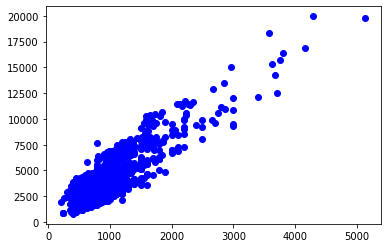

In [0]:
_ = plt.plot(submit1_df.size_sqft, submit1_df.rent, color='blue', marker='.', markersize=12, linestyle='none')
_ = plt.plot([0, 10000], [alpha, alpha + beta * 10000],  color='red', linewidth=4)
_ = plt.title('')

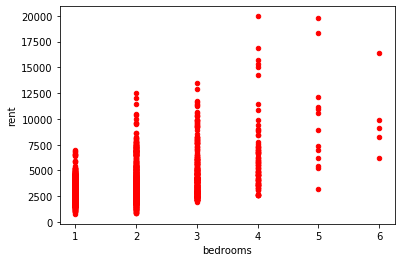

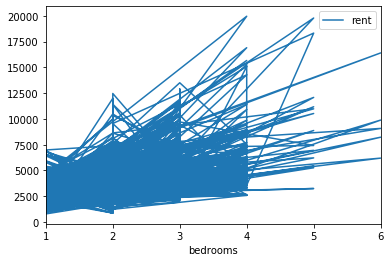

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
submit1_df.plot(kind='scatter',x='bedrooms',y='rent',color='red')
plt.show()

# a scatter plot comparing num_children and num_pets
#submit1_df.plot(kind='pie',x='bedrooms',y='rent',color='red')
#plt.show()

lines = submit1_df.plot.line(x='bedrooms',y='rent')

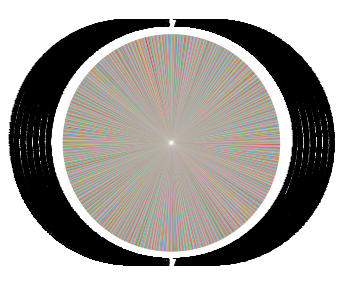

In [0]:
#uplot = submit1_df['bedrooms'].plot.pie(y='rent', figsize=(5, 5))

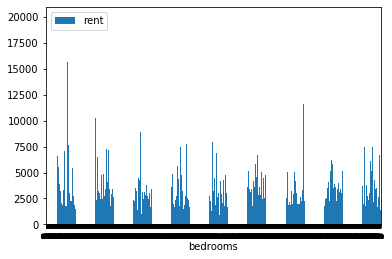

In [0]:
submit1_df.plot(kind='bar',x='bedrooms',y='rent')

#submit1_df.groupby('bedrooms').plot(kind='bar',y='rent')
plt.show()

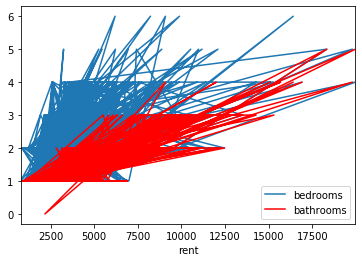

In [0]:
ax = plt.gca()

submit1_df.plot(kind='line',x='rent',y='bedrooms',ax=ax)
submit1_df.plot(kind='line',x='rent',y='bathrooms', color='red', ax=ax)

plt.show()

In [0]:
import statsmodels.api as sm
import warnings

# Add a constant to our existing dataframe for modeling purposes
submit1_df = sm.add_constant(submit1_df)

est = sm.OLS(submit1_df['size_sqft'], 
             submit1_df[['rent', 'bathrooms','bedrooms',]]
            ).fit()

print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:              size_sqft   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          1.059e+04
Date:                Wed, 20 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:35:04   Log-Likelihood:                         -13820.
No. Observations:                2000   AIC:                                  2.765e+04
Df Residuals:                    1997   BIC:                                  2.766e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
